In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('train_data.csv')
df.head(

#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60115 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    60115 non-null  int64 
 1   Sentence_id   60115 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          60115 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df_cleaned = df.dropna().copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59002 entries, 0 to 60114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    59002 non-null  int64 
 1   Sentence_id   59002 non-null  object
 2   New_Sentence  59002 non-null  object
 3   Type          59002 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df_cleaned.duplicated().sum()

0

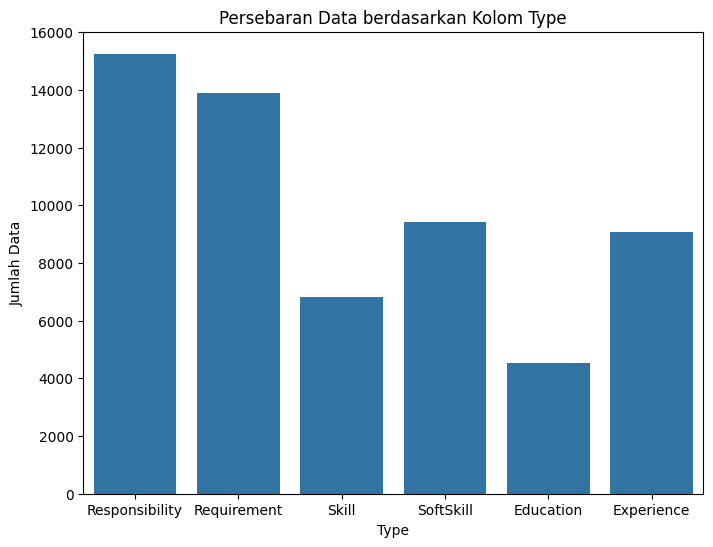

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df_cleaned)
plt.title('Persebaran Data berdasarkan Kolom Type')
plt.xlabel('Type')
plt.ylabel('Jumlah Data')
plt.show()

# Preprocessing Data

## Mengubah semua huruf ke huruf kecil


In [ ]:
df_cleaned['Lower_Sentence'] = df_cleaned['New_Sentence'].str.lower()
df_cleaned[['New_Sentence', 'Lower_Sentence']].head()

New_Sentence  \
0  Author and/or Review architecture/design and o...   
1  Should be able to develop custom dynamic shape...   
2  Experience in working crosslly with a  larger ...   
3  Previous business experience, including but no...   
4         Delivering fast and right the first  time.   

                                      Lower_Sentence  
0  author and/or review architecture/design and o...  
1  should be able to develop custom dynamic shape...  
2  experience in working crosslly with a  larger ...  
3  previous business experience, including but no...  
4         delivering fast and right the first  time.

## Menghilangkan simbol

In [ ]:
import re

df_cleaned['Mod_Sentence'] = df_cleaned['Lower_Sentence'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
df_cleaned[['Lower_Sentence', 'Mod_Sentence']].head()

Lower_Sentence  \
0  author and/or review architecture/design and o...   
1  should be able to develop custom dynamic shape...   
2  experience in working crosslly with a  larger ...   
3  previous business experience, including but no...   
4         delivering fast and right the first  time.   

                                        Mod_Sentence  
0  author and or review architecture design and o...  
1  should be able to develop custom dynamic shape...  
2  experience in working crosslly with a  larger ...  
3  previous business experience  including but no...  
4         delivering fast and right the first  time

## Menghapus kalimat selain bahasa Inggiris

In [ ]:
# !pip install langdetect

from langdetect import detect

def is_english(text):
  """Checks if the text is in English."""
  try:
    return detect(text) == 'en'
  except:
    return False

df_cleaned = df_cleaned[df_cleaned['Mod_Sentence'].apply(is_english)].copy()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52537 entries, 0 to 60114
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      52537 non-null  int64 
 1   Sentence_id     52537 non-null  object
 2   New_Sentence    52537 non-null  object
 3   Type            52537 non-null  object
 4   Lower_Sentence  52537 non-null  object
 5   Mod_Sentence    52537 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


## Spell correction

In [ ]:
from tqdm import tqdm
from spellchecker import SpellChecker

# Inisialisasi spell checker (default = bahasa Inggris)
spell = SpellChecker()

# Fungsi koreksi ejaan untuk 1 kalimat
def correct_sentence(sentence):
    words = sentence.split()
    corrected = []
    for word in words:
        # Koreksi hanya kata yang tidak dikenal
        if word.lower() not in spell:
            corrected_word = spell.correction(word)
            if corrected_word:
                corrected.append(corrected_word)
            else:
                corrected.append(word)
        else:
            corrected.append(word)
    return ' '.join(corrected)

tqdm.pandas()
df_cleaned['corrected_text'] = df_cleaned['Mod_Sentence'].progress_apply(correct_sentence)

# Tampilkan hasil
df_cleaned[['Mod_Sentence', 'corrected_text']]


100%|██████████| 52537/52537 [2:25:01<00:00,  6.04it/s]


Mod_Sentence  \
0      author and or review architecture design and o...   
1      should be able to develop custom dynamic shape...   
2      experience in working crosslly with a  larger ...   
3      previous business experience  including but no...   
4             delivering fast and right the first  time    
...                                                  ...   
60109  6 years  of industry experience with process c...   
60110  in this position  you will  utilize your progr...   
60111  in addition  this individual will be responsib...   
60113                            good excel knowledge      
60114  bachelors degree in  electrical engineering  m...   

                                          corrected_text  
0      author and or review architecture design and o...  
1      should be able to develop custom dynamic shape...  
2      experience in working crossly with a larger en...  
3      previous business experience including but not...  
4               delivering fast and right the first time  
...                                                  ...  
60109  6 years of industry experience with process co...  
60110  in this position you will utilize your program...  
60111  in addition this individual will be responsibl...  
60113                               good excel knowledge  
60114  bachelors degree in electrical engineering mec...  

[52537 rows x 2 columns]

## Tokenisasi

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# nltk.download('punkt_tab')

df_cleaned['tokenized_text'] = df_cleaned['corrected_text'].apply(word_tokenize)

df_cleaned[['corrected_text', 'tokenized_text']].head()

corrected_text  \
0  author and or review architecture design and o...   
1  should be able to develop custom dynamic shape...   
2  experience in working crossly with a larger en...   
3  previous business experience including but not...   
4           delivering fast and right the first time   

                                      tokenized_text  
0  [author, and, or, review, architecture, design...  
1  [should, be, able, to, develop, custom, dynami...  
2  [experience, in, working, crossly, with, a, la...  
3  [previous, business, experience, including, bu...  
4   [delivering, fast, and, right, the, first, time]

## Menghilangkan stopwords

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
  return [word for word in tokens if word not in stop_words]

df_cleaned['stopwords'] = df_cleaned['tokenized_text'].apply(remove_stopwords)

df_cleaned[['tokenized_text', 'stopwords']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tokenized_text  \
0  [author, and, or, review, architecture, design...   
1  [should, be, able, to, develop, custom, dynami...   
2  [experience, in, working, crossly, with, a, la...   
3  [previous, business, experience, including, bu...   
4   [delivering, fast, and, right, the, first, time]   

                                           stopwords  
0  [author, review, architecture, design, technic...  
1  [able, develop, custom, dynamic, shape, object...  
2  [experience, working, crossly, larger, enginee...  
3  [previous, business, experience, including, li...  
4             [delivering, fast, right, first, time]

## Lemmatizer

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df_cleaned['lemmatized_text'] = df_cleaned['stopwords'].apply(lemmatize_tokens)

df_cleaned[['stopwords', 'lemmatized_text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


tokenized_text  \
0  [author, and, or, review, architecture, design...   
1  [should, be, able, to, develop, custom, dynami...   
2  [experience, in, working, crossly, with, a, la...   
3  [previous, business, experience, including, bu...   
4   [delivering, fast, and, right, the, first, time]   

                                     lemmatized_text  
0  [author, and, or, review, architecture, design...  
1  [should, be, able, to, develop, custom, dynami...  
2  [experience, in, working, crossly, with, a, la...  
3  [previous, business, experience, including, bu...  
4   [delivering, fast, and, right, the, first, time]

## Menghapus data kosong hasil dari preprocessing data (ini jangan diisi di flowchart)

In [ ]:
df_cleaned = df_cleaned[df_cleaned['lemmatized_text'].apply(lambda x: len(x) > 0)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52533 entries, 0 to 52536
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       52533 non-null  int64 
 1   Sentence_id      52533 non-null  object
 2   New_Sentence     52533 non-null  object
 3   Type             52533 non-null  object
 4   Lower_Sentence   52533 non-null  object
 5   Mod_Sentence     52533 non-null  object
 6   corrected_text   52533 non-null  object
 7   tokenized_text   52533 non-null  object
 8   stopwords        52533 non-null  object
 9   lemmatized_text  52533 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.4+ MB


## Wordcloud (ini jangan diisi di flowchart)

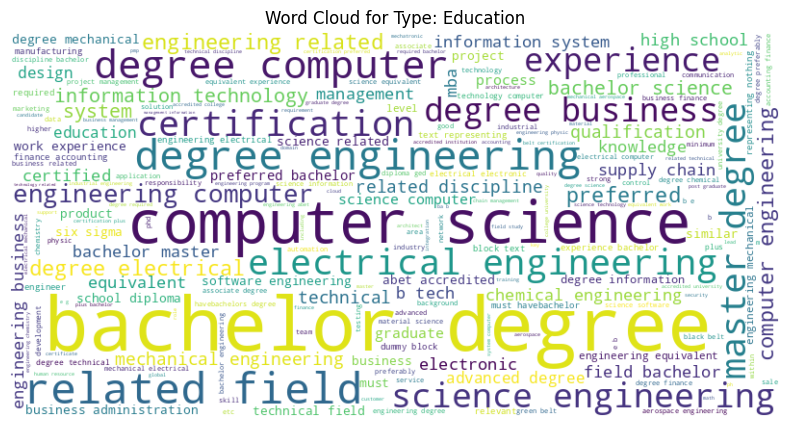

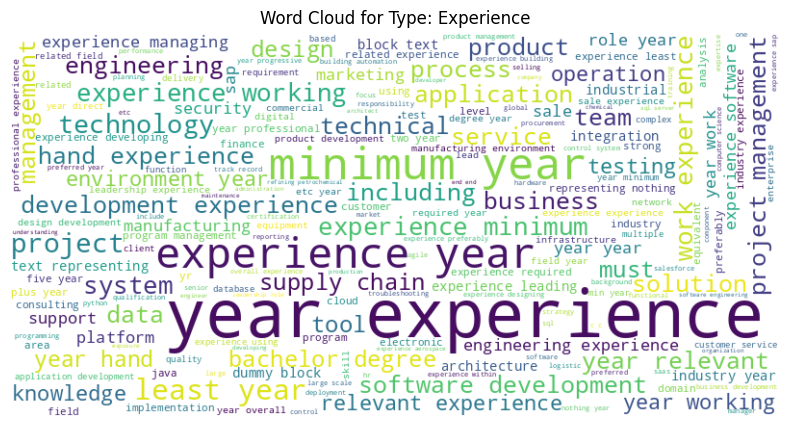

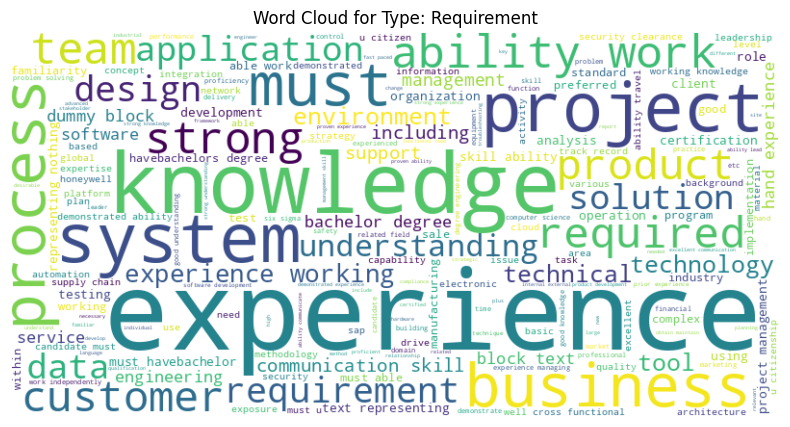

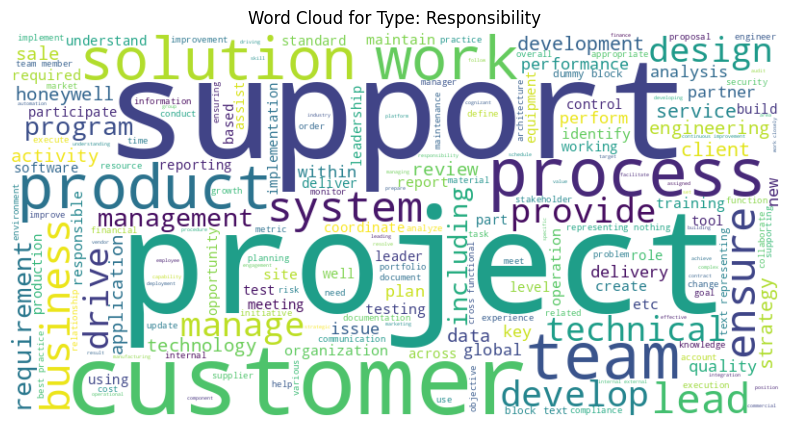

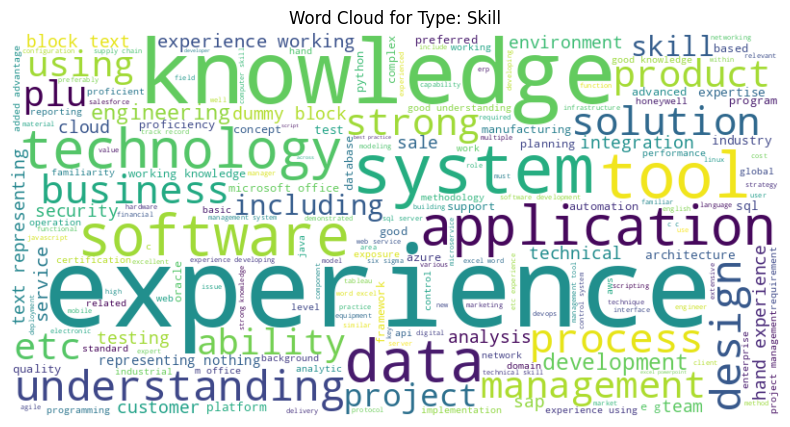

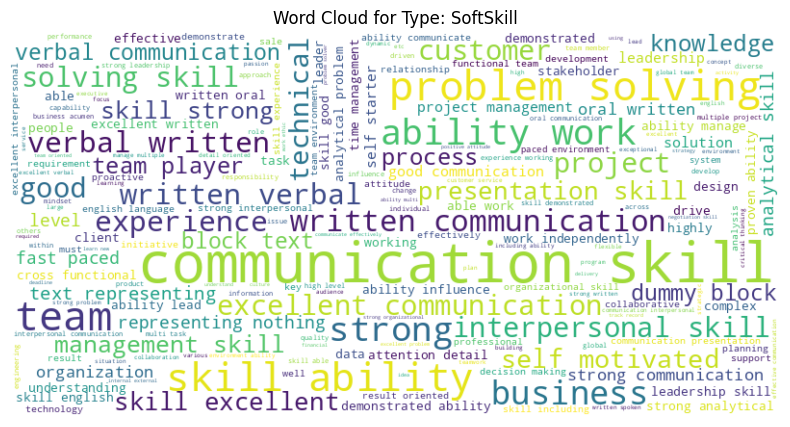

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud

tokens_by_type = df_cleaned.groupby('Type')['lemmatized_text'].agg(lambda x: [item for sublist in x for item in sublist])

for type, tokens in tokens_by_type.items():
  text = ' '.join(tokens)
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title(f'Word Cloud for Type: {type}')
  plt.show()

# Vectorization

## TF-IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_cleaned['tokenized_text_str'] = df_cleaned['lemmatized_text'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000,  ngram_range=(1, 3))

tfidf_matrix = tfidf_vectorizer.fit_transform(df_cleaned['tokenized_text_str'])

NameError: name 'df_cleaned' is not defined

## Word2Vec

In [ ]:
# !pip install gensim

from gensim.models import Word2Vec
import numpy as np

word2vec_data = df_cleaned['lemmatized_text'].tolist()

word2vec_model = Word2Vec(sentences=word2vec_data, vector_size=100, window=5, min_count=1, workers=4)

def document_vector(doc, model):
  doc = [word for word in doc if word in model.wv.index_to_key]
  if len(doc) == 0:
    return None
  return np.mean(model.wv[doc], axis=0)

df_cleaned['word2vec_vector'] = df_cleaned['lemmatized_text'].apply(lambda x: document_vector(x, word2vec_model))

df_cleaned.dropna(subset=['word2vec_vector'], inplace=True)

print("Shape of the Word2Vec vectors:", df_cleaned['word2vec_vector'].iloc[0].shape)
print("First document vector:\n", df_cleaned['word2vec_vector'].iloc[0])

## Glove

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip -q glove.6B.zip

# Load the GloVe model
def load_glove_model(glove_file):
    print("Loading GloVe model")
    glove_model = {}
    with open(glove_file, "r", encoding="utf8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model

glove_model = load_glove_model("glove.6B.100d.txt")

def document_vector_glove(doc, model):
  doc = [word for word in doc if word in model]
  if len(doc) == 0:
    return np.zeros(100)
  return np.mean([model[word] for word in doc], axis=0)

df_cleaned['glove_vector'] = df_cleaned['lemmatized_text'].apply(lambda x: document_vector_glove(x, glove_model))

# The 'glove_vector' column now contains the document embeddings
print("Shape of the GloVe vectors:", df_cleaned['glove_vector'].iloc[0].shape)
print("First document vector:\n", df_cleaned['glove_vector'].iloc[0])

## Mengubah string menjadi numerik pada type

In [ ]:
type_mapping = {type: i for i, type in enumerate(df_cleaned['Type'].unique())}
df_cleaned['Type_Numeric'] = df_cleaned['Type'].map(type_mapping)

print("\nMapping of Numerical Type to Original Type:")
for numeric_type, original_type in type_mapping.items():
    print(f"Numerical Type {original_type}: {numeric_type}")


Mapping of Numerical Type to Original Type:
Numerical Type 0: Responsibility
Numerical Type 1: Requirement
Numerical Type 2: Skill
Numerical Type 3: SoftSkill
Numerical Type 4: Education
Numerical Type 5: Experience


# Modeling

## TF-IDF

### Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df_cleaned['Type_Numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Oversampling

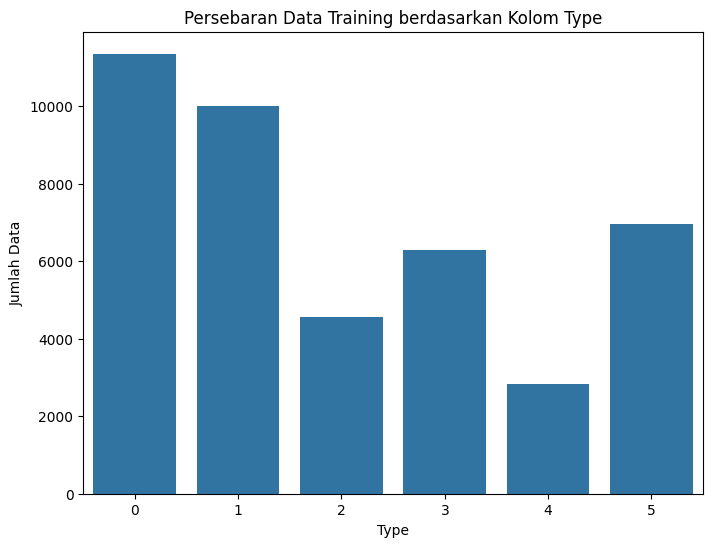

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Persebaran Data Training berdasarkan Kolom Type')
plt.xlabel('Type')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

ros = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

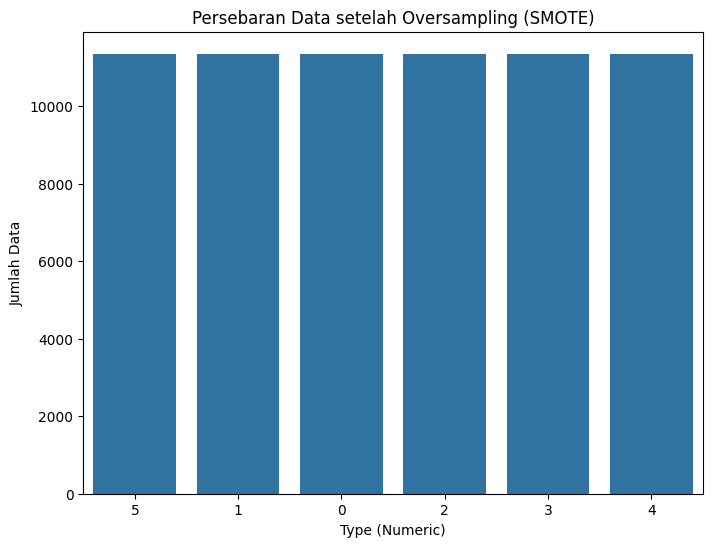

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled)
plt.title('Persebaran Data setelah Oversampling (SMOTE)')
plt.xlabel('Type (Numeric)')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=range(len(y_train_resampled.unique())), labels=y_train_resampled.unique())
plt.show()

### Fungsi evaluasi

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate_performance(y_true, y_pred, type_mapping=type_mapping):
  """
  Menilai performa model menggunakan Confusion Matrix, Accuracy, dan Classification Report.

  Args:
    y_true (array-like): Label sebenarnya.
    y_pred (array-like): Label hasil prediksi.
    type_mapping (dict): Mapping dari label numerik ke label string asli.
  """
  cm = confusion_matrix(y_true, y_pred)

  reverse_type_mapping = {v: k for k, v in type_mapping.items()}
  class_labels = [reverse_type_mapping[i] for i in sorted(reverse_type_mapping)]


  plt.figure(figsize=(5, 3))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Type')
  plt.ylabel('True Type')
  plt.show()

  accuracy = accuracy_score(y_true, y_pred)
  print("\nAccuracy:", accuracy)

  cr = classification_report(y_true, y_pred, target_names=class_labels)
  print("\nClassification Report:\n", cr)

### SVM

Evaluating SVM Model (using TF-IDF features):


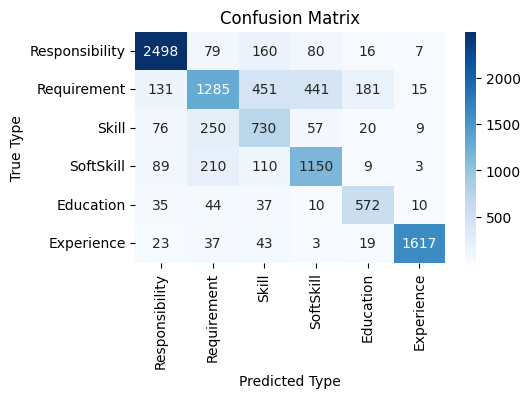


Accuracy: 0.7473113162653469

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.88      0.88      0.88      2840
   Requirement       0.67      0.51      0.58      2504
         Skill       0.48      0.64      0.55      1142
     SoftSkill       0.66      0.73      0.69      1571
     Education       0.70      0.81      0.75       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.75     10507
     macro avg       0.73      0.75      0.73     10507
  weighted avg       0.76      0.75      0.75     10507



In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_resampled, y_train_resampled)

y_pred_svm = svm_model.predict(X_test)

print("Evaluating SVM Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_svm)


### Naive bayes

Evaluating Naive Bayes Model (using TF-IDF features):


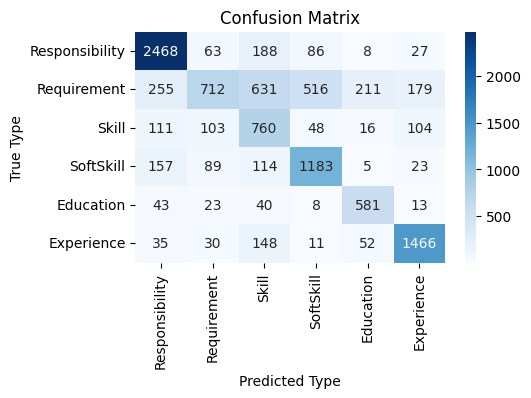


Accuracy: 0.682402208051775

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.80      0.87      0.84      2840
   Requirement       0.70      0.28      0.40      2504
         Skill       0.40      0.67      0.50      1142
     SoftSkill       0.64      0.75      0.69      1571
     Education       0.67      0.82      0.73       708
    Experience       0.81      0.84      0.82      1742

      accuracy                           0.68     10507
     macro avg       0.67      0.71      0.67     10507
  weighted avg       0.70      0.68      0.67     10507



In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train_resampled, y_train_resampled)

y_pred_nb = nb_model.predict(X_test)

print("Evaluating Naive Bayes Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_nb)

### KNN

Evaluating KNN Model (using TF-IDF features):


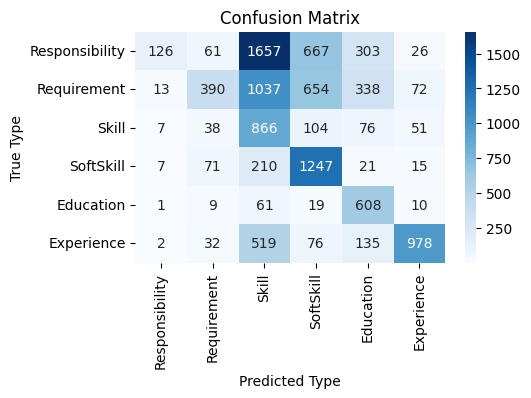


Accuracy: 0.40116113067478826

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.81      0.04      0.08      2840
   Requirement       0.65      0.16      0.25      2504
         Skill       0.20      0.76      0.32      1142
     SoftSkill       0.45      0.79      0.57      1571
     Education       0.41      0.86      0.56       708
    Experience       0.85      0.56      0.68      1742

      accuracy                           0.40     10507
     macro avg       0.56      0.53      0.41     10507
  weighted avg       0.63      0.40      0.35     10507



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn_model.predict(X_test)

print("Evaluating KNN Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_knn)

### Xgboost

Evaluating XGBoost Model (using TF-IDF features):


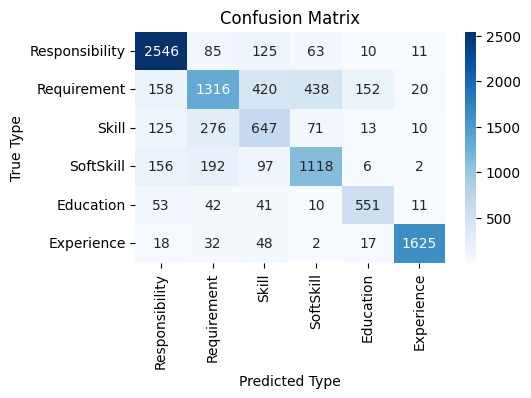


Accuracy: 0.7426477586370991

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.83      0.90      0.86      2840
   Requirement       0.68      0.53      0.59      2504
         Skill       0.47      0.57      0.51      1142
     SoftSkill       0.66      0.71      0.68      1571
     Education       0.74      0.78      0.76       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.74     10507
     macro avg       0.72      0.74      0.73     10507
  weighted avg       0.75      0.74      0.74     10507



In [ ]:
# !pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

print("Evaluating XGBoost Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_xgb)

### Gradient Boosting

Evaluating Gradient Boosting Model (using TF-IDF features):


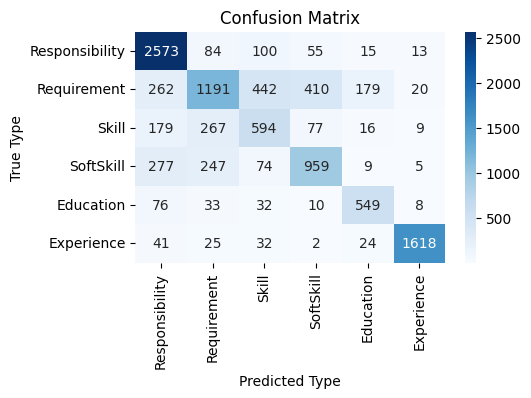


Accuracy: 0.7122870467307509

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.75      0.91      0.82      2840
   Requirement       0.64      0.48      0.55      2504
         Skill       0.47      0.52      0.49      1142
     SoftSkill       0.63      0.61      0.62      1571
     Education       0.69      0.78      0.73       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.71     10507
     macro avg       0.69      0.70      0.69     10507
  weighted avg       0.71      0.71      0.71     10507



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_model.fit(X_train_resampled, y_train_resampled)

y_pred_gb = gb_model.predict(X_test)

print("Evaluating Gradient Boosting Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_gb)

### Random forest

Evaluating Random Forest Model (using TF-IDF features):


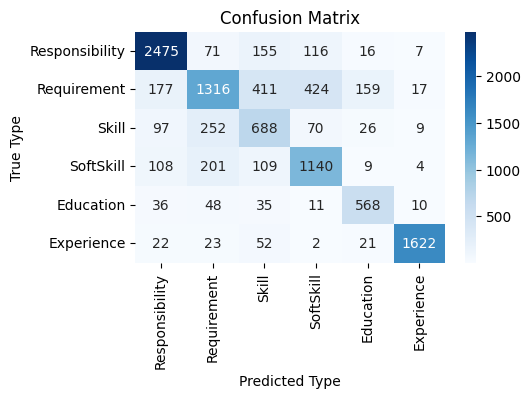


Accuracy: 0.7432188065099458

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.85      0.87      0.86      2840
   Requirement       0.69      0.53      0.60      2504
         Skill       0.47      0.60      0.53      1142
     SoftSkill       0.65      0.73      0.68      1571
     Education       0.71      0.80      0.75       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.74     10507
     macro avg       0.72      0.74      0.73     10507
  weighted avg       0.75      0.74      0.74     10507



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

print("Evaluating Random Forest Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_rf)

## Word2vec

### Data splitting

In [ ]:
X_word2vec = np.array(df_cleaned['word2vec_vector'].tolist())
y_word2vec = df_cleaned['Type_Numeric']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_word2vec, y_word2vec, test_size=0.2, random_state=42, stratify=y_word2vec)

### Oversampling

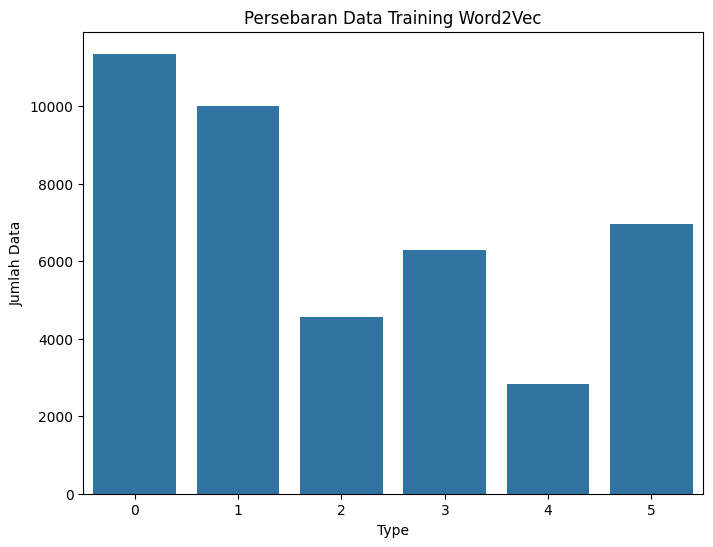

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_w2v)
plt.title('Persebaran Data Training Word2Vec')
plt.xlabel('Type')
plt.ylabel('Jumlah Data')
plt.show()

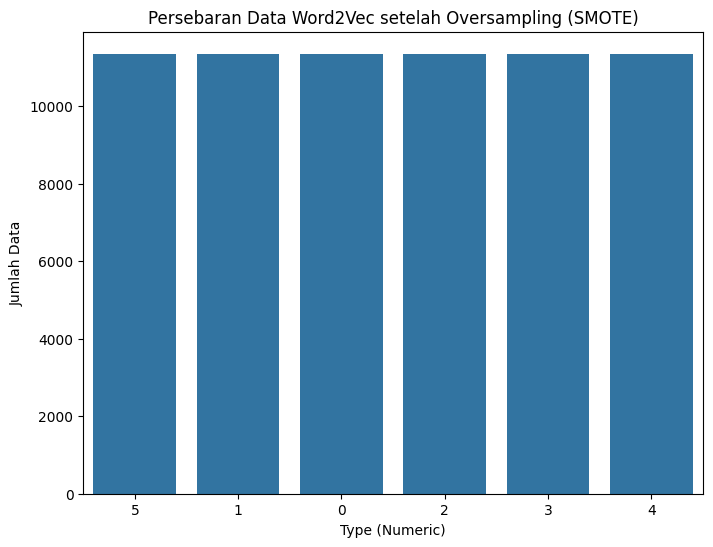

In [ ]:
X_train_w2v_resampled, y_train_w2v_resampled = ros.fit_resample(X_train_w2v, y_train_w2v)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_w2v_resampled)
plt.title('Persebaran Data Word2Vec setelah Oversampling (SMOTE)')
plt.xlabel('Type (Numeric)')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=range(len(y_train_w2v_resampled.unique())), labels=y_train_w2v_resampled.unique())
plt.show()

### SVM

Evaluating SVM Model (using Word2Vec features):


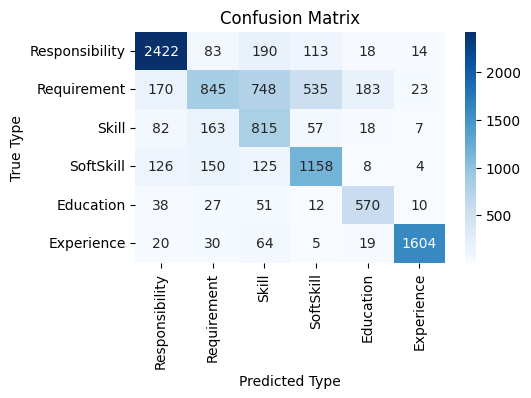


Accuracy: 0.7056248215475397

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.85      0.85      0.85      2840
   Requirement       0.65      0.34      0.44      2504
         Skill       0.41      0.71      0.52      1142
     SoftSkill       0.62      0.74      0.67      1571
     Education       0.70      0.81      0.75       708
    Experience       0.97      0.92      0.94      1742

      accuracy                           0.71     10507
     macro avg       0.70      0.73      0.70     10507
  weighted avg       0.73      0.71      0.70     10507



In [ ]:
svm_model_w2v = SVC(kernel='linear')

svm_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_svm_w2v = svm_model_w2v.predict(X_test_w2v)

print("Evaluating SVM Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_svm_w2v)

### Naive bayes

Evaluating Gaussian Naive Bayes Model (using Word2Vec features):


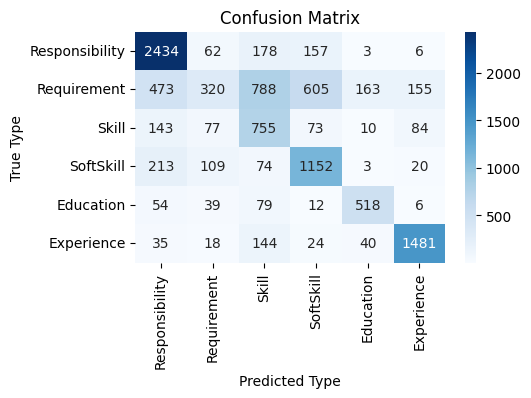


Accuracy: 0.6338631388598077

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.73      0.86      0.79      2840
   Requirement       0.51      0.13      0.20      2504
         Skill       0.37      0.66      0.48      1142
     SoftSkill       0.57      0.73      0.64      1571
     Education       0.70      0.73      0.72       708
    Experience       0.85      0.85      0.85      1742

      accuracy                           0.63     10507
     macro avg       0.62      0.66      0.61     10507
  weighted avg       0.63      0.63      0.60     10507



In [ ]:
nb_model_w2v = MultinomialNB()

from sklearn.naive_bayes import GaussianNB

gnb_model_w2v = GaussianNB()

gnb_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_gnb_w2v = gnb_model_w2v.predict(X_test_w2v)

print("Evaluating Gaussian Naive Bayes Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_gnb_w2v)


### KNN

Evaluating KNN Model (using Word2Vec features):


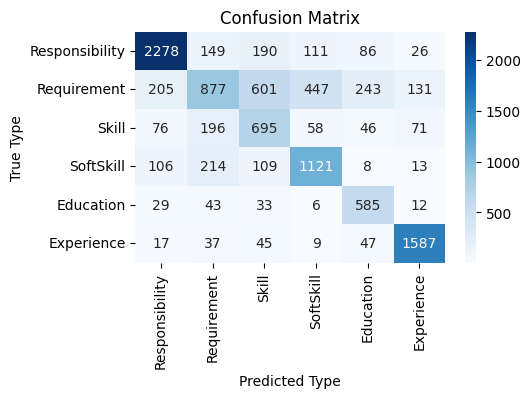


Accuracy: 0.679832492623965

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.84      0.80      0.82      2840
   Requirement       0.58      0.35      0.44      2504
         Skill       0.42      0.61      0.49      1142
     SoftSkill       0.64      0.71      0.67      1571
     Education       0.58      0.83      0.68       708
    Experience       0.86      0.91      0.89      1742

      accuracy                           0.68     10507
     macro avg       0.65      0.70      0.67     10507
  weighted avg       0.69      0.68      0.67     10507



In [ ]:
knn_model_w2v = KNeighborsClassifier(n_neighbors=10)

knn_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_knn_w2v = knn_model_w2v.predict(X_test_w2v)

print("Evaluating KNN Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_knn_w2v)



### Xgboost

Evaluating XGBoost Model (using Word2Vec features):


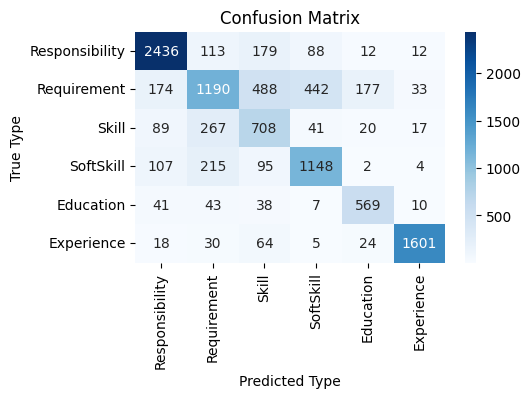


Accuracy: 0.7282763871704578

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.85      0.86      0.85      2840
   Requirement       0.64      0.48      0.55      2504
         Skill       0.45      0.62      0.52      1142
     SoftSkill       0.66      0.73      0.70      1571
     Education       0.71      0.80      0.75       708
    Experience       0.95      0.92      0.94      1742

      accuracy                           0.73     10507
     macro avg       0.71      0.73      0.72     10507
  weighted avg       0.74      0.73      0.73     10507



In [ ]:
xgb_model_w2v = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

xgb_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_xgb_w2v = xgb_model_w2v.predict(X_test_w2v)

print("Evaluating XGBoost Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_xgb_w2v)

### Gradient boosting

Evaluating Gradient Boosting Model (using Word2Vec features):


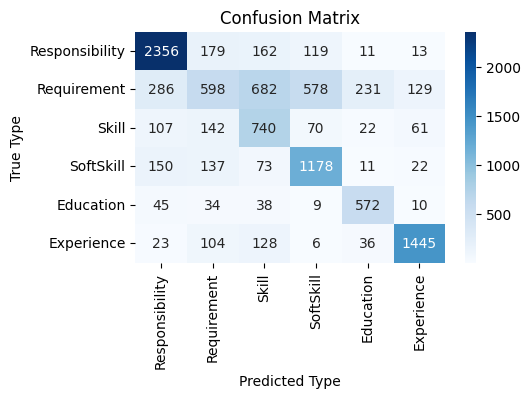


Accuracy: 0.6556581326734557

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.79      0.83      0.81      2840
   Requirement       0.50      0.24      0.32      2504
         Skill       0.41      0.65      0.50      1142
     SoftSkill       0.60      0.75      0.67      1571
     Education       0.65      0.81      0.72       708
    Experience       0.86      0.83      0.84      1742

      accuracy                           0.66     10507
     macro avg       0.63      0.68      0.64     10507
  weighted avg       0.65      0.66      0.64     10507



In [ ]:
gb_model_w2v = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)

gb_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_gb_w2v = gb_model_w2v.predict(X_test_w2v)

print("Evaluating Gradient Boosting Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_gb_w2v)


### Random forest

Evaluating Random Forest Model (using Word2Vec features):


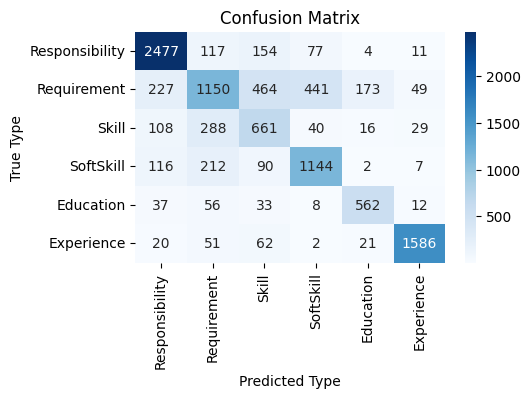


Accuracy: 0.7214238126962977

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.83      0.87      0.85      2840
   Requirement       0.61      0.46      0.53      2504
         Skill       0.45      0.58      0.51      1142
     SoftSkill       0.67      0.73      0.70      1571
     Education       0.72      0.79      0.76       708
    Experience       0.94      0.91      0.92      1742

      accuracy                           0.72     10507
     macro avg       0.70      0.72      0.71     10507
  weighted avg       0.72      0.72      0.72     10507



In [ ]:
rf_model_w2v = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_w2v.fit(X_train_w2v_resampled, y_train_w2v_resampled)

y_pred_rf_w2v = rf_model_w2v.predict(X_test_w2v)

print("Evaluating Random Forest Model (using Word2Vec features):")
evaluate_performance(y_test_w2v, y_pred_rf_w2v)

## Glove

### Data splitting

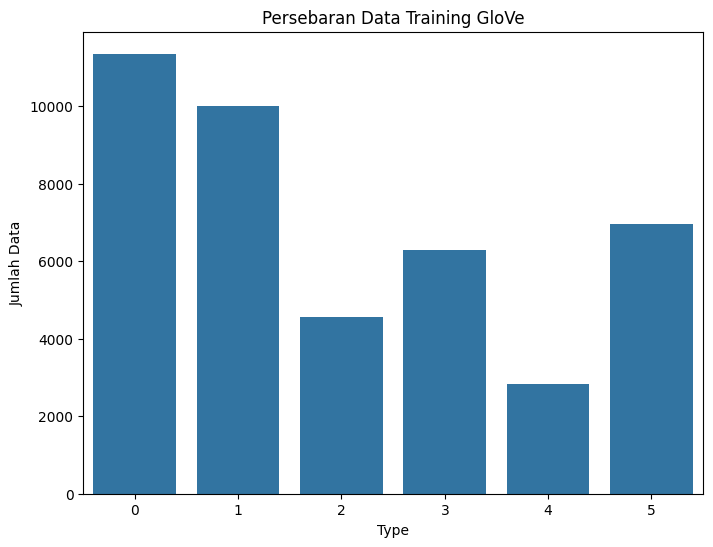

In [ ]:
X_glove = np.array(df_cleaned['glove_vector'].tolist())
y_glove = df_cleaned['Type_Numeric']

X_train_glove, X_test_glove, y_train_glove, y_test_glove = train_test_split(X_glove, y_glove, test_size=0.2, random_state=42, stratify=y_glove)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_glove)
plt.title('Persebaran Data Training GloVe')
plt.xlabel('Type')
plt.ylabel('Jumlah Data')
plt.show()

### Oversampling

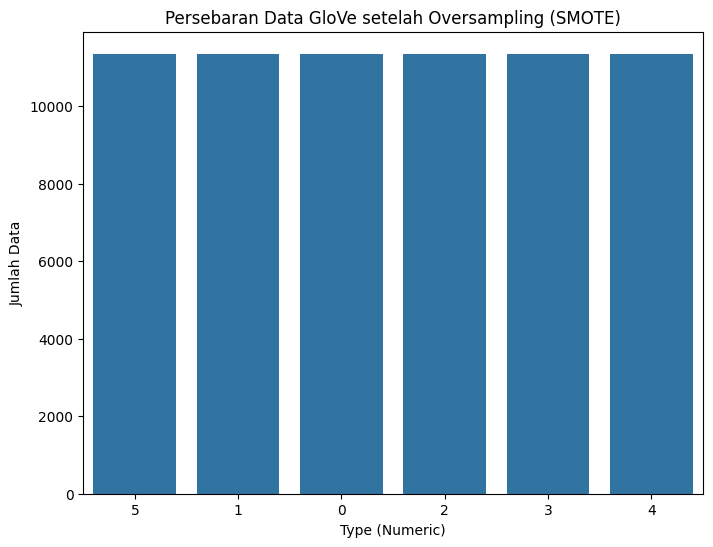

In [ ]:
# Resample the training data using SMOTE for GloVe features
X_train_glove_resampled, y_train_glove_resampled = ros.fit_resample(X_train_glove, y_train_glove)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_glove_resampled)
plt.title('Persebaran Data GloVe setelah Oversampling (SMOTE)')
plt.xlabel('Type (Numeric)')
plt.ylabel('Jumlah Data')
plt.xticks(ticks=range(len(y_train_glove_resampled.unique())), labels=y_train_glove_resampled.unique())
plt.show()

### SVM

Evaluating SVM Model (using GloVe features):


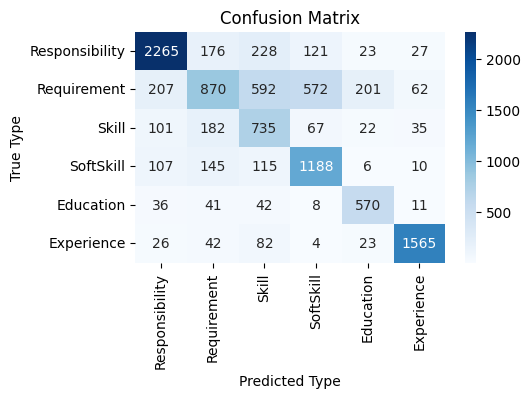


Accuracy: 0.6845912248976873

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.83      0.80      0.81      2840
   Requirement       0.60      0.35      0.44      2504
         Skill       0.41      0.64      0.50      1142
     SoftSkill       0.61      0.76      0.67      1571
     Education       0.67      0.81      0.73       708
    Experience       0.92      0.90      0.91      1742

      accuracy                           0.68     10507
     macro avg       0.67      0.71      0.68     10507
  weighted avg       0.70      0.68      0.68     10507



In [ ]:
svm_model_glove = SVC(kernel='linear')

svm_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_svm_glove = svm_model_glove.predict(X_test_glove)

print("Evaluating SVM Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_svm_glove)


### Naive bayes

Evaluating Gaussian Naive Bayes Model (using GloVe features):


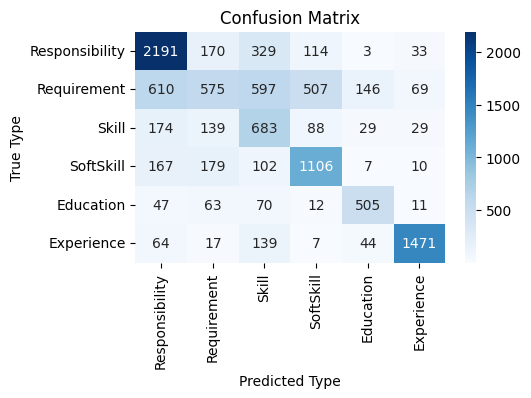


Accuracy: 0.6215856095936043

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.67      0.77      0.72      2840
   Requirement       0.50      0.23      0.32      2504
         Skill       0.36      0.60      0.45      1142
     SoftSkill       0.60      0.70      0.65      1571
     Education       0.69      0.71      0.70       708
    Experience       0.91      0.84      0.87      1742

      accuracy                           0.62     10507
     macro avg       0.62      0.64      0.62     10507
  weighted avg       0.63      0.62      0.61     10507



In [ ]:
gnb_model_glove = GaussianNB()

gnb_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_gnb_glove = gnb_model_glove.predict(X_test_glove)

print("Evaluating Gaussian Naive Bayes Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_gnb_glove)


### KNN

Evaluating KNN Model (using GloVe features):


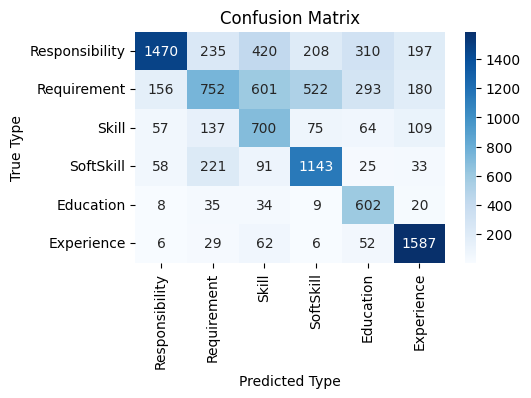


Accuracy: 0.5952222327971828

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.84      0.52      0.64      2840
   Requirement       0.53      0.30      0.38      2504
         Skill       0.37      0.61      0.46      1142
     SoftSkill       0.58      0.73      0.65      1571
     Education       0.45      0.85      0.59       708
    Experience       0.75      0.91      0.82      1742

      accuracy                           0.60     10507
     macro avg       0.59      0.65      0.59     10507
  weighted avg       0.63      0.60      0.59     10507



In [ ]:
knn_model_glove = KNeighborsClassifier(n_neighbors=10)

knn_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_knn_glove = knn_model_glove.predict(X_test_glove)

print("Evaluating KNN Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_knn_glove)

### Xgboost

Evaluating XGBoost Model (using GloVe features):


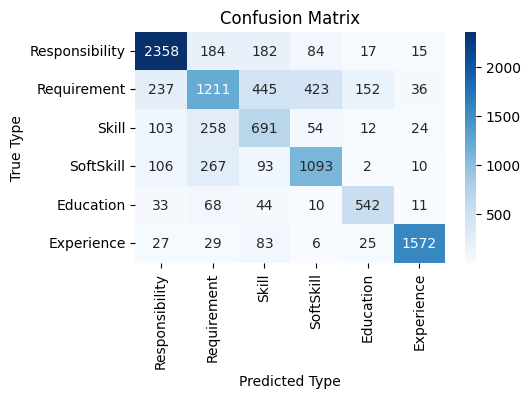


Accuracy: 0.7106690777576854

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.82      0.83      0.83      2840
   Requirement       0.60      0.48      0.54      2504
         Skill       0.45      0.61      0.52      1142
     SoftSkill       0.65      0.70      0.67      1571
     Education       0.72      0.77      0.74       708
    Experience       0.94      0.90      0.92      1742

      accuracy                           0.71     10507
     macro avg       0.70      0.71      0.70     10507
  weighted avg       0.72      0.71      0.71     10507



In [ ]:
xgb_model_glove = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)

xgb_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_xgb_glove = xgb_model_glove.predict(X_test_glove)

print("Evaluating XGBoost Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_xgb_glove)

### Gradient boosting

Evaluating Gradient Boosting Model (using GloVe features):


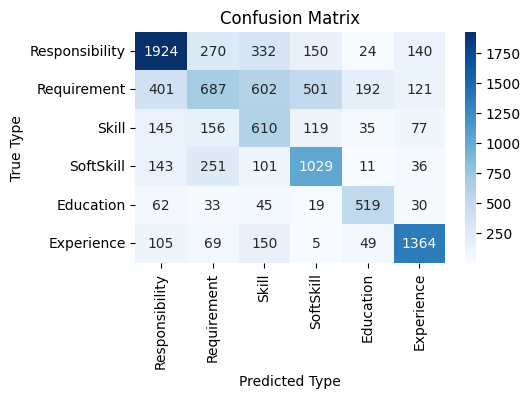


Accuracy: 0.5837061006947749

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.69      0.68      0.68      2840
   Requirement       0.47      0.27      0.35      2504
         Skill       0.33      0.53      0.41      1142
     SoftSkill       0.56      0.65      0.61      1571
     Education       0.63      0.73      0.67       708
    Experience       0.77      0.78      0.78      1742

      accuracy                           0.58     10507
     macro avg       0.58      0.61      0.58     10507
  weighted avg       0.59      0.58      0.58     10507



In [ ]:
gb_model_glove = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)

gb_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_gb_glove = gb_model_glove.predict(X_test_glove)

print("Evaluating Gradient Boosting Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_gb_glove)

### Random forest

Evaluating Random Forest Model (using GloVe features):


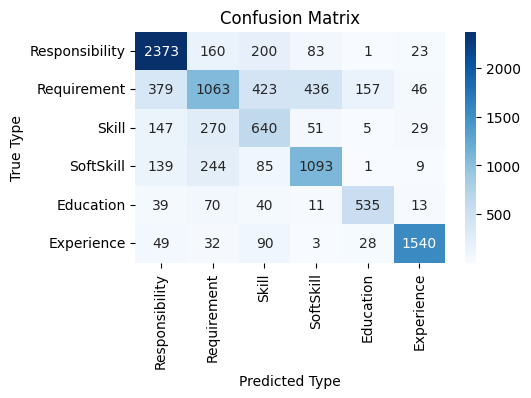


Accuracy: 0.6894451318168839

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.76      0.84      0.80      2840
   Requirement       0.58      0.42      0.49      2504
         Skill       0.43      0.56      0.49      1142
     SoftSkill       0.65      0.70      0.67      1571
     Education       0.74      0.76      0.75       708
    Experience       0.93      0.88      0.91      1742

      accuracy                           0.69     10507
     macro avg       0.68      0.69      0.68     10507
  weighted avg       0.69      0.69      0.69     10507



In [ ]:
rf_model_glove = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model_glove.fit(X_train_glove_resampled, y_train_glove_resampled)

y_pred_rf_glove = rf_model_glove.predict(X_test_glove)

print("Evaluating Random Forest Model (using GloVe features):")
evaluate_performance(y_test_glove, y_pred_rf_glove)

## Hyper parameter tuning

### Random forest

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for RandomForestClassifier (TF-IDF): {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

Evaluating Best RandomForest Model (using TF-IDF features):


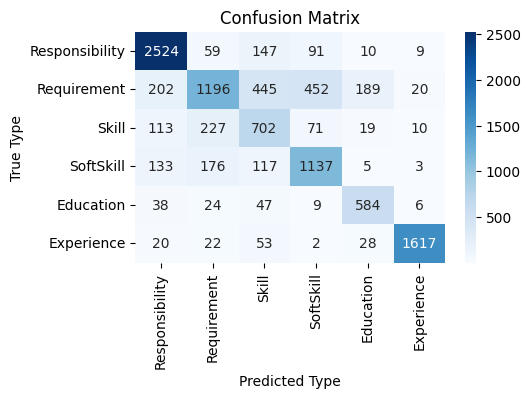


Accuracy: 0.7385552488816979

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.83      0.89      0.86      2840
   Requirement       0.70      0.48      0.57      2504
         Skill       0.46      0.61      0.53      1142
     SoftSkill       0.65      0.72      0.68      1571
     Education       0.70      0.82      0.76       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.74     10507
     macro avg       0.72      0.74      0.72     10507
  weighted avg       0.75      0.74      0.74     10507



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters for RandomForestClassifier (TF-IDF):", random_search.best_params_)

best_rf_model_tfidf = random_search.best_estimator_

y_pred_best_rf_tfidf = best_rf_model_tfidf.predict(X_test)

print("\nEvaluating Best RandomForest Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_best_rf_tfidf)

### Random forest

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters for SVC (TF-IDF): {'kernel': 'rbf', 'gamma': 1, 'C': 100}

Evaluating Best SVC Model (using TF-IDF features):


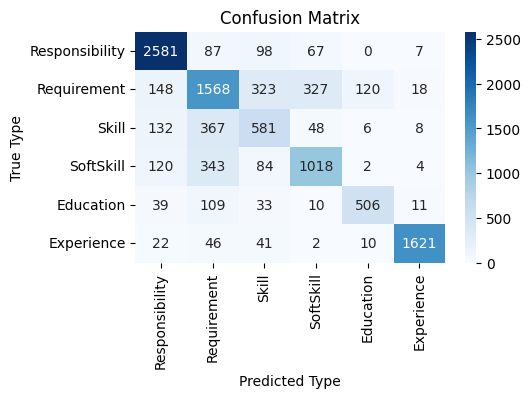


Accuracy: 0.7495003331112592

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.85      0.91      0.88      2840
   Requirement       0.62      0.63      0.62      2504
         Skill       0.50      0.51      0.50      1142
     SoftSkill       0.69      0.65      0.67      1571
     Education       0.79      0.71      0.75       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.75     10507
     macro avg       0.74      0.72      0.73     10507
  weighted avg       0.75      0.75      0.75     10507



In [ ]:
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}

svm = SVC(random_state=42)

random_search_svm = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=-1)

random_search_svm.fit(X_train_resampled, y_train_resampled)

print("Best parameters for SVC (TF-IDF):", random_search_svm.best_params_)

best_svm_model_tfidf = random_search_svm.best_estimator_

y_pred_best_svm_tfidf = best_svm_model_tfidf.predict(X_test)

print("\nEvaluating Best SVC Model (using TF-IDF features):")
evaluate_performance(y_test, y_pred_best_svm_tfidf)

# Experiment

## Tokenisais

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

df_cleaned['tokenized_text'] = df_cleaned['corrected_text'].apply(word_tokenize)

df_cleaned[['corrected_text', 'tokenized_text']].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


corrected_text  \
0  author and or review architecture design and o...   
1  should be able to develop custom dynamic shape...   
2  experience in working crossly with a larger en...   
3  previous business experience including but not...   
4           delivering fast and right the first time   

                                      tokenized_text  
0  [author, and, or, review, architecture, design...  
1  [should, be, able, to, develop, custom, dynami...  
2  [experience, in, working, crossly, with, a, la...  
3  [previous, business, experience, including, bu...  
4   [delivering, fast, and, right, the, first, time]

## Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
  return [lemmatizer.lemmatize(word) for word in tokens]

df_cleaned['lemmatized_text'] = df_cleaned['tokenized_text'].apply(lemmatize_tokens)

df_cleaned[['tokenized_text', 'lemmatized_text']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


tokenized_text  \
0  [author, and, or, review, architecture, design...   
1  [should, be, able, to, develop, custom, dynami...   
2  [experience, in, working, crossly, with, a, la...   
3  [previous, business, experience, including, bu...   
4   [delivering, fast, and, right, the, first, time]   

                                     lemmatized_text  
0  [author, and, or, review, architecture, design...  
1  [should, be, able, to, develop, custom, dynami...  
2  [experience, in, working, crossly, with, a, la...  
3  [previous, business, experience, including, bu...  
4   [delivering, fast, and, right, the, first, time]

## menghapus data kosong hasil preprocesing

In [ ]:
df_cleaned = df_cleaned[df_cleaned['lemmatized_text'].apply(lambda x: len(x) > 0)]

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52537 entries, 0 to 52536
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       52537 non-null  int64 
 1   Sentence_id      52537 non-null  object
 2   New_Sentence     52537 non-null  object
 3   Type             52537 non-null  object
 4   Lower_Sentence   52537 non-null  object
 5   Mod_Sentence     52537 non-null  object
 6   corrected_text   52537 non-null  object
 7   tokenized_text   52537 non-null  object
 8   lemmatized_text  52537 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

df_cleaned['tokenized_text_str'] = df_cleaned['lemmatized_text'].apply(lambda x: ' '.join(x))

tfidf_vectorizer_no_stopwords = TfidfVectorizer(max_features=6000,  ngram_range=(1, 3))

tfidf_matrix_no_stopwords = tfidf_vectorizer_no_stopwords.fit_transform(df_cleaned['tokenized_text_str'])

print("Shape of the TF-IDF matrix (no stopwords):", tfidf_matrix_no_stopwords.shape)

Shape of the TF-IDF matrix (no stopwords): (52537, 6000)


## pemodelan dengan SVM & random forest

Evaluating SVM Model (using TF-IDF features without stopwords):


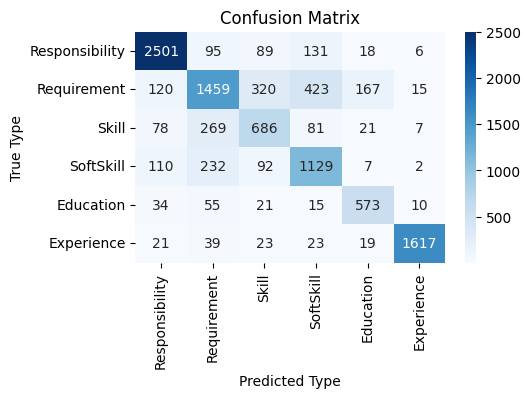


Accuracy: 0.7579939094023601

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.87      0.88      0.88      2840
   Requirement       0.68      0.58      0.63      2504
         Skill       0.56      0.60      0.58      1142
     SoftSkill       0.63      0.72      0.67      1572
     Education       0.71      0.81      0.76       708
    Experience       0.98      0.93      0.95      1742

      accuracy                           0.76     10508
     macro avg       0.74      0.75      0.74     10508
  weighted avg       0.76      0.76      0.76     10508



In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


X_no_stopwords = tfidf_matrix_no_stopwords
y_no_stopwords = df_cleaned['Type_Numeric']

X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_no_stopwords, y_no_stopwords, test_size=0.2, random_state=42, stratify=y_no_stopwords)

ros_ns = SMOTE(random_state=42)
X_train_resampled_ns, y_train_resampled_ns = ros_ns.fit_resample(X_train_ns, y_train_ns)

svm_model_ns = SVC(kernel='linear')
svm_model_ns.fit(X_train_resampled_ns, y_train_resampled_ns)

y_pred_svm_ns = svm_model_ns.predict(X_test_ns)

print("Evaluating SVM Model (using TF-IDF features without stopwords):")

evaluate_performance(y_test_ns, y_pred_svm_ns, type_mapping)

Evaluating Random Forest Model (using TF-IDF features without stopwords):


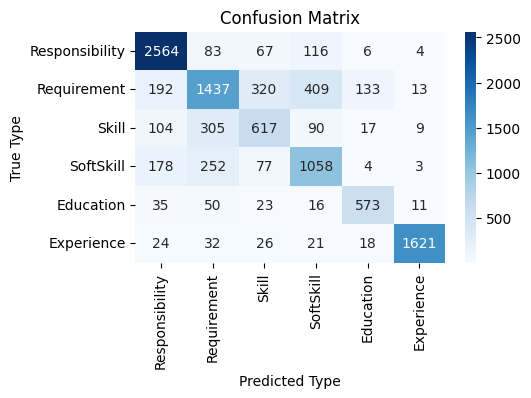


Accuracy: 0.7489531785306434

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.83      0.90      0.86      2840
   Requirement       0.67      0.57      0.62      2504
         Skill       0.55      0.54      0.54      1142
     SoftSkill       0.62      0.67      0.64      1572
     Education       0.76      0.81      0.79       708
    Experience       0.98      0.93      0.95      1742

      accuracy                           0.75     10508
     macro avg       0.73      0.74      0.73     10508
  weighted avg       0.75      0.75      0.75     10508



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_ns = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_ns.fit(X_train_resampled_ns, y_train_resampled_ns)

y_pred_rf_ns = rf_model_ns.predict(X_test_ns)

print("Evaluating Random Forest Model (using TF-IDF features without stopwords):")
evaluate_performance(y_test_ns, y_pred_rf_ns, type_mapping)

## Menggunakan Chi-Square

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_features = 6000
chi2_selector = SelectKBest(chi2, k=k_features)

X_train_chi2 = chi2_selector.fit_transform(X_train_ns, y_train_ns)
X_test_chi2 = chi2_selector.transform(X_test_ns)

In [ ]:
ros_chi2 = SMOTE(random_state=42)
X_train_chi2_resampled, y_train_chi2_resampled = ros_chi2.fit_resample(X_train_chi2, y_train_ns)

Evaluating SVM Model (using 6000 Chi-Square selected features):


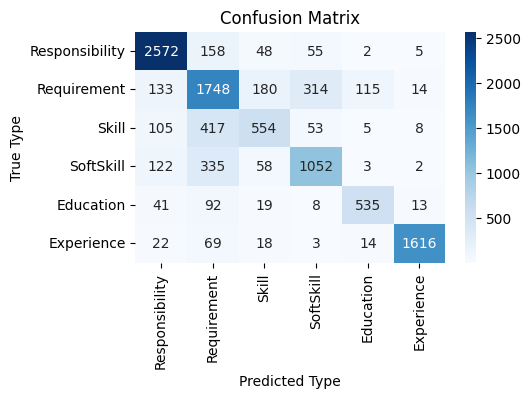


Accuracy: 0.7686524552721736

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.86      0.91      0.88      2840
   Requirement       0.62      0.70      0.66      2504
         Skill       0.63      0.49      0.55      1142
     SoftSkill       0.71      0.67      0.69      1572
     Education       0.79      0.76      0.77       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.77     10508
     macro avg       0.76      0.74      0.75     10508
  weighted avg       0.77      0.77      0.77     10508



In [ ]:
svm_model_chi2 = SVC(kernel='linear')
svm_model_chi2.fit(X_train_chi2, y_train_ns)

y_pred_svm_chi2 = svm_model_chi2.predict(X_test_chi2)

print(f"Evaluating SVM Model (using {k_features} Chi-Square selected features):")
evaluate_performance(y_test_ns, y_pred_svm_chi2, type_mapping)

Evaluating Random Forest Model (using 6000 Chi-Square selected features):


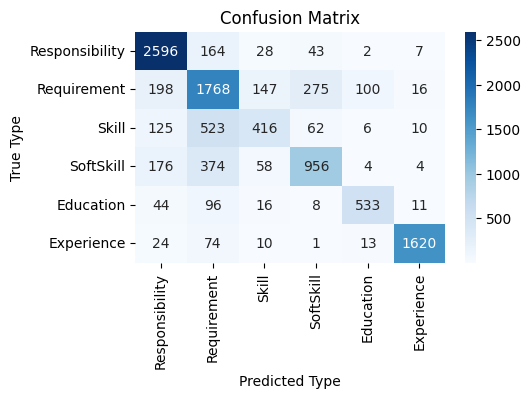


Accuracy: 0.7507613247049867

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.82      0.91      0.86      2840
   Requirement       0.59      0.71      0.64      2504
         Skill       0.62      0.36      0.46      1142
     SoftSkill       0.71      0.61      0.66      1572
     Education       0.81      0.75      0.78       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.75     10508
     macro avg       0.75      0.71      0.73     10508
  weighted avg       0.75      0.75      0.74     10508



In [ ]:
rf_model_chi2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_chi2.fit(X_train_chi2, y_train_ns)

y_pred_rf_chi2 = rf_model_chi2.predict(X_test_chi2)

print(f"Evaluating Random Forest Model (using {k_features} Chi-Square selected features):")
evaluate_performance(y_test_ns, y_pred_rf_chi2, type_mapping)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameters for SVC (Chi-Square): {'kernel': 'rbf', 'gamma': 1, 'C': 100}

Evaluating Best SVC Model (using Chi-Square features):


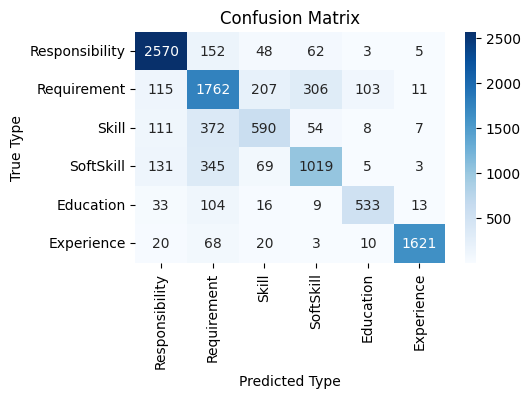


Accuracy: 0.7703654358583936

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.86      0.90      0.88      2840
   Requirement       0.63      0.70      0.66      2504
         Skill       0.62      0.52      0.56      1142
     SoftSkill       0.70      0.65      0.67      1572
     Education       0.81      0.75      0.78       708
    Experience       0.98      0.93      0.95      1742

      accuracy                           0.77     10508
     macro avg       0.77      0.74      0.75     10508
  weighted avg       0.77      0.77      0.77     10508



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
}

svm = SVC(random_state=42)

random_search_svm_chi2 = RandomizedSearchCV(estimator=svm, param_distributions=param_dist_svm, n_iter=5, cv=2, verbose=2, random_state=42, n_jobs=-1)

random_search_svm_chi2.fit(X_train_chi2, y_train_ns)

print("Best parameters for SVC (Chi-Square):", random_search_svm_chi2.best_params_)

best_svm_model_chi2 = random_search_svm_chi2.best_estimator_

y_pred_best_svm_chi2 = best_svm_model_chi2.predict(X_test_chi2)

print("\nEvaluating Best SVC Model (using Chi-Square features):")
evaluate_performance(y_test_ns, y_pred_best_svm_chi2, type_mapping)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for RandomForestClassifier (Chi-Square): {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

Evaluating Best RandomForest Model (using Chi-Square features):


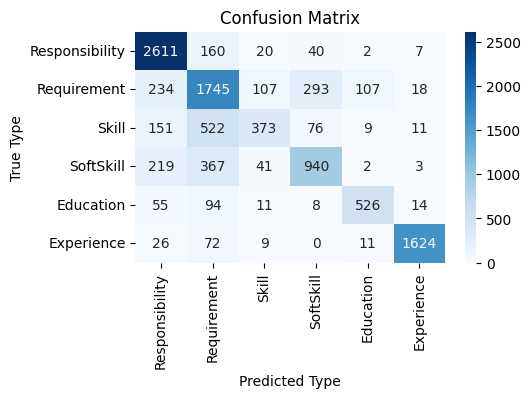


Accuracy: 0.7440997335363533

Classification Report:
                 precision    recall  f1-score   support

Responsibility       0.79      0.92      0.85      2840
   Requirement       0.59      0.70      0.64      2504
         Skill       0.66      0.33      0.44      1142
     SoftSkill       0.69      0.60      0.64      1572
     Education       0.80      0.74      0.77       708
    Experience       0.97      0.93      0.95      1742

      accuracy                           0.74     10508
     macro avg       0.75      0.70      0.72     10508
  weighted avg       0.74      0.74      0.74     10508



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf_chi2 = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)

random_search_rf_chi2.fit(X_train_chi2, y_train_ns)

print("Best parameters for RandomForestClassifier (Chi-Square):", random_search_rf_chi2.best_params_)

best_rf_model_chi2 = random_search_rf_chi2.best_estimator_

y_pred_best_rf_chi2 = best_rf_model_chi2.predict(X_test_chi2)

print("\nEvaluating Best RandomForest Model (using Chi-Square features):")
evaluate_performance(y_test_ns, y_pred_best_rf_chi2, type_mapping)